# 📈 Unit 1.5: Bayesian Regression & Gaussian Processes

**Course:** Advanced Machine Learning (AICC 303)  
**Topics:**
*   1.7 Bayesian Regression
*   1.9 Gaussian Processes (GP)

**Standard Regression:** Predicts a single value $y = wx + b$.
**Bayesian Regression:** Predicts a distribution of possible $y$ values, capturing uncertainty.

**Gaussian Processes:** A powerful non-parametric method where we learn a distribution over *functions*, not just parameters.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Setup
sns.set(style="whitegrid")
np.random.seed(42)

## 1. Bayesian Linear Regression

Instead of finding one "best" line, we find a distribution of likely lines.
The model assumes the weights $w$ follow a Gaussian prior.

$$ y \sim \mathcal{N}(w^T x, \alpha^{-1}) $$
$$ w \sim \mathcal{N}(0, \lambda^{-1}) $$

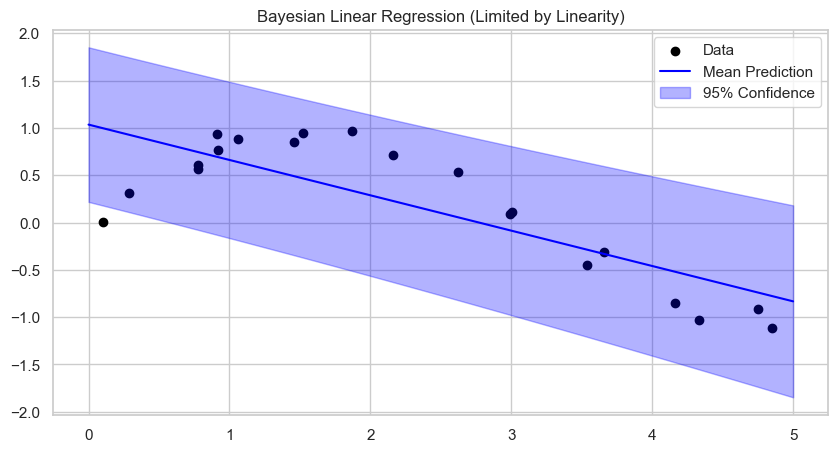

In [2]:
# Generate Synthetic Data
X = np.sort(5 * np.random.rand(20, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Fit Bayesian Ridge
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

# Predict
X_test = np.linspace(0, 5, 100)[:, np.newaxis]
y_mean, y_std = clf.predict(X_test, return_std=True)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_test, y_mean, color='blue', label='Mean Prediction')
plt.fill_between(X_test.ravel(), y_mean - 1.96 * y_std, y_mean + 1.96 * y_std, 
                 alpha=0.3, color='blue', label='95% Confidence')
plt.title("Bayesian Linear Regression (Limited by Linearity)")
plt.legend()
plt.show()

## 2. Gaussian Processes (GP)

GPs can model non-linear functions by defining a **Kernel** (covariance) function.
It assumes any finite set of points follows a multivariate Gaussian distribution.

**Kernel:** RBF (Radial Basis Function) - Points close in X should have close Y values.

c:\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


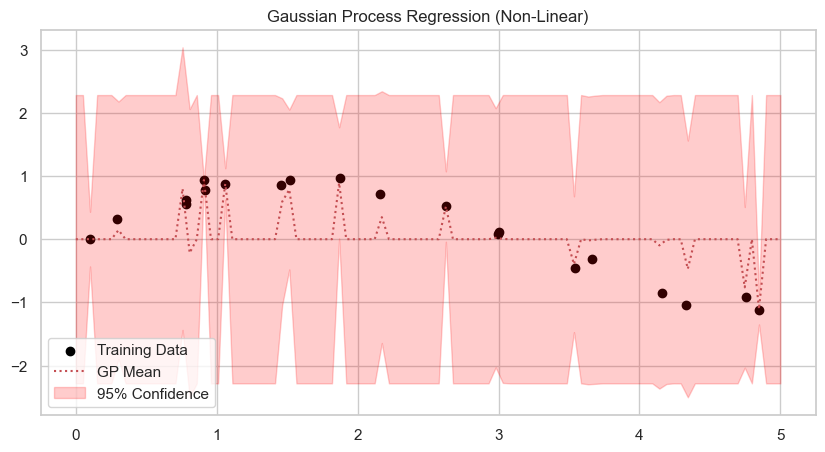

In [3]:
# Define Kernel: Constant * RBF + Noise
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit
gp.fit(X, y)

# Predict
y_pred, sigma = gp.predict(X_test, return_std=True)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='black', label='Training Data')
plt.plot(X_test, y_pred, 'r:', label='GP Mean')
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.96 * sigma, 
                 y_pred + 1.96 * sigma, 
                 alpha=0.2, color='red', label='95% Confidence')
plt.title("Gaussian Process Regression (Non-Linear)")
plt.legend()
plt.show()

### Why GP?
Notice how the confidence interval expands in regions where we have no data (e.g., gaps). This "fear of the unknown" is crucial for safe AI and active learning.